In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from helper_funcs import *
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
## Clustering Zip Codes -------------------------------------

In [2]:
zip_data = pd.read_csv('https://nycdsacapstone2021.blob.core.windows.net/additionaldata/final_zip_data.csv', index_col=0)

In [3]:
zip_data['school_rating'].fillna(value = zip_data['school_rating'].mean(), inplace = True)
zip_data['Hosp_count'].fillna(value = zip_data['Hosp_count'].mean(), inplace = True)


In [48]:
zip_data.columns

Index(['State', 'County', 'CBSA_Name', 'CountyFIPS', 'StateFIPS', 'Population',
       'HouseholdsPerZipCode', 'WhitePopulation', 'BlackPopulation',
       'HispanicPopulation', 'AsianPopulation', 'IndianPopulation',
       'OtherPopulation', 'MalePopulation', 'FemalePopulation',
       'AverageHouseValue', 'IncomePerHousehold', 'MedianAge',
       'NumberOfBusinesses', 'over_65_ratio', 'school_rating', 'Hosp_count',
       'Zip_count', 'HPI', 'Demand_score', 'Supply_score', 'listviews_vs_US',
       'med_days_on_mkt', 'nielson_rank', 'UE_rate', 'Zillow_HVF',
       'BEA_percap_income', 'Survey_Date', 'FIPS_State', 'FIPS_County',
       'Region_Code', 'Division_Code', 'State_y', 'state_abbrev',
       'County_Name', 'one_unit_buildings_rep', 'one_unit_units_rep',
       'one_unit_value_reps', 'two_unit_buildings_rep', 'two_unit_units_rep',
       'two_unit_value_rep', 'three_unit_building_rep', 'three_unit_untis_rep',
       'three_unit_value_rep', 'five_unit_building_rep', 'five_unit_

In [152]:
### Cluster zip codes to feed into redfin data
## For now, keeping numerical columns that have no null values 
zip_data = zip_data[zip_data['Population'] > 0]
cols_to_cluster = [ 'Population', 'IncomePerHousehold', 'AverageHouseValue']
zip_cluster = zip_data[cols_to_cluster]
scaler = MinMaxScaler()
# zip_cluster.dropna(axis = 0, inplace = True) 
zip_cluster = scaler.fit_transform(zip_cluster)

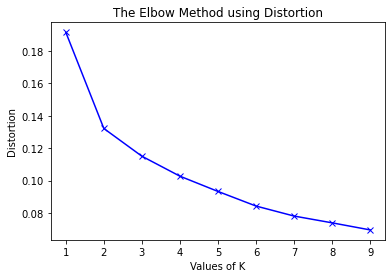

In [153]:
### Use elbow method to determine number of clusters
X = zip_cluster
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [154]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(zip_cluster)
zip_data['cluster'] = kmeans.labels_

In [8]:
zip_data.columns

Index(['State', 'County', 'CBSA_Name', 'CountyFIPS', 'StateFIPS', 'Population',
       'HouseholdsPerZipCode', 'WhitePopulation', 'BlackPopulation',
       'HispanicPopulation', 'AsianPopulation', 'IndianPopulation',
       'OtherPopulation', 'MalePopulation', 'FemalePopulation',
       'AverageHouseValue', 'IncomePerHousehold', 'MedianAge',
       'NumberOfBusinesses', 'over_65_ratio', 'school_rating', 'Hosp_count',
       'Zip_count', 'HPI', 'Demand_score', 'Supply_score', 'listviews_vs_US',
       'med_days_on_mkt', 'nielson_rank', 'UE_rate', 'Zillow_HVF',
       'BEA_percap_income', 'Survey_Date', 'FIPS_State', 'FIPS_County',
       'Region_Code', 'Division_Code', 'State_y', 'state_abbrev',
       'County_Name', 'one_unit_buildings_rep', 'one_unit_units_rep',
       'one_unit_value_reps', 'two_unit_buildings_rep', 'two_unit_units_rep',
       'two_unit_value_rep', 'three_unit_building_rep', 'three_unit_untis_rep',
       'three_unit_value_rep', 'five_unit_building_rep', 'five_unit_

In [129]:
# [ 'Population', 'IncomePerHousehold', 'AverageHouseValue', 'school_rating', 'Hosp_count']

In [74]:
## Clustering EDA 

In [155]:
px.scatter(zip_data, y = 'IncomePerHousehold', x = 'Population', color = 'cluster')

In [156]:


px.scatter_3d(zip_data, x= 'Population' , y= 'IncomePerHousehold', z ='MedianAge', color = 'cluster', size = "NumberOfBusinesses")

In [157]:
fig = px.parallel_coordinates(zip_data, color = 'cluster', 
                             dimensions = ['cluster', 'Population', 'IncomePerHousehold', 
                                            'AverageHouseValue'])
fig.show()

In [158]:
grouped = zip_data.groupby('cluster')[ 'Population', 'HouseholdsPerZipCode','AverageHouseValue', 'school_rating', 'IncomePerHousehold', 'NumberOfBusinesses','Hosp_count'].median()

In [159]:
grouped = grouped.reset_index()

In [160]:
fig = px.parallel_coordinates(grouped, color = 'cluster', 
                             dimensions = ['cluster','Population', 'AverageHouseValue', 'IncomePerHousehold'])
fig.show()

In [161]:
px.scatter_3d(grouped, x= 'Population' , y= 'IncomePerHousehold', z ='AverageHouseValue', color = 'cluster')

In [ ]:
zip_clusters = zip_data[['cluster']]
zip_clusters = zip_clusters.reset_index()

In [ ]:
### Merge zips into data

In [ ]:
RF = get_all()


In [ ]:
RF = pd.merge(RF, zip_clusters, how = 'left', left_on = 'zip', right_on = 'ZipCode')
# RF.dropna(axis= 0 , inplace = True)

In [ ]:
RF.dtypes

In [ ]:
RF.drop(RF[RF.BEDS.isna() | RF.BATHS.isna()].index, inplace=True)
RF.loc[RF.overallRating.isna(),'overallRating'] = 5
### Split data into train test split
#pd.set_option('display.max_rows', None)
zip_houses = RF.groupby('zip').agg('count')['PRICE'].to_dict()
RF['houses_perZIP'] = RF.zip.apply(lambda r: zip_houses[r])
RF = RF[RF.houses_perZIP>4]
# Use groupby to split the df into smaller dfs for each ZIP
groups = RF.groupby('zip')
dfs = [groups.get_group(x) for x in groups.groups]
# Use first df to initiate X_train, X_test, etc
for d in dfs[:1]:
    feat = d[['Prop_Type','BEDS','BATHS','SF','Lot_Size','YearBuilt','zip','cluster']]
    feat.zip = feat.zip.astype('object')
    y = np.log10(d.PRICE)
    X_train, X_test, y_train, y_test = train_test_split(feat, y)
    
# train_test_split each df then stack together
for d in dfs[1:]:
    feat = d[['Prop_Type','BEDS','BATHS','SF','Lot_Size','YearBuilt','zip','cluster']]
    feat.zip = feat.zip.astype('object')
    y = np.log10(d.PRICE)
    X_trainpiece, X_testpiece, y_trainpiece, y_testpiece = train_test_split(feat, y, test_size=0.25)
    X_train = X_train.append(X_trainpiece)
    X_test = X_test.append(X_testpiece)
    y_train = y_train.append(y_trainpiece)
    y_test = y_test.append(y_testpiece)
    
# Check rows
print(f'X_train rows: {X_train.shape}')
print(f'X_test rows: {X_test.shape}')
print(f'y_train rows: {y_train.shape}')
print(f'y_test rows: {y_test.shape}')

In [ ]:
X_train_linear = pd.get_dummies(X_train, drop_first=True)
X_test_linear = pd.get_dummies(X_test, drop_first=True)

In [ ]:
### Linear Regression
lm = LinearRegression()
lm.fit(X_train_linear, y_train)
print(f'train R2: {lm.score(X_train_linear, y_train)}')
print(f'train R2: {lm.score(X_test_linear, y_test)}')

In [ ]:
## CatBoost
X_train_le = X_train.copy()
X_test_le = X_test.copy()


le = LabelEncoder()
X_train_le.Prop_Type = le.fit_transform(X_train_le.Prop_Type)
X_test_le.Prop_Type = le.fit_transform(X_test_le.Prop_Type)
# X_train_le.zip = le.fit_transform(X_train_le.zip)
# X_test_le.zip = le.fit_transform(X_test_le.zip)
cat = CatBoostRegressor(verbose=False)
cat.get_params()
cat.fit(X_train_le, y_train)
print(f'Train R2: {cat.score(X_train_le, y_train)}')
print(f'Test R2: {cat.score(X_test_le, y_test)}')